In [1]:
import numpy as np
import pandas as pd
from scipy.signal import savgol_filter
from pykrx import stock
import matplotlib.pyplot as plt
import time
plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
"""
분석 기간
"""
start_year = '2012'
end_year = '2021'

In [3]:
"""
삼성증권
"""
code = '016360'

In [4]:
"""
매년 5월 31에 제일 가까운 영업일의 배당금 가져 오기
"""
dps_list = []
for year in range(int(start_year)+1, int(end_year)+2):
    #print(year)
    last_business_day_of_may = stock.get_nearest_business_day_in_a_week(str(year)+'0531')
    print(last_business_day_of_may)
    df_annual_f = stock.get_market_fundamental(last_business_day_of_may, last_business_day_of_may, code)
    display(df_annual_f)
    dps_list.append(df_annual_f.DPS.values[0])
    time.sleep(1)

20130531


,BPS,PER,PBR,EPS,DIV,DPS
날짜,,,,,,
2013-05-31,42473,20.31,1.21,2521,1.37,700


20140530


,BPS,PER,PBR,EPS,DIV,DPS
날짜,,,,,,
2014-05-30,43119,277.36,0.95,148,0.24,100


20150529


,BPS,PER,PBR,EPS,DIV,DPS
날짜,,,,,,
2015-05-29,44832,18.9,1.3,3090,1.11,650


20160531


,BPS,PER,PBR,EPS,DIV,DPS
날짜,,,,,,
2016-05-31,46102,9.33,0.77,3821,2.81,1000


20170531


,BPS,PER,PBR,EPS,DIV,DPS
날짜,,,,,,
2017-05-31,48564,16.35,0.83,2455,1.62,650


20180531


,BPS,PER,PBR,EPS,DIV,DPS
날짜,,,,,,
2018-05-31,49380,11.77,0.75,3135,2.71,1000


20190531


,BPS,PER,PBR,EPS,DIV,DPS
날짜,,,,,,
2019-05-31,52207,9.45,0.68,3741,3.96,1400


20200529


,BPS,PER,PBR,EPS,DIV,DPS
날짜,,,,,,
2020-05-29,55423,6.37,0.5,4388,6.08,1700


20210531


,BPS,PER,PBR,EPS,DIV,DPS
날짜,,,,,,
2021-05-31,59542,8.35,0.8,5686,4.64,2200


20220531


,BPS,PER,PBR,EPS,DIV,DPS
날짜,,,,,,
2022-05-31,68096,3.67,0.58,10810,9.58,3800


In [38]:
dps_list

[700, 100, 650, 1000, 650, 1000, 1400, 1700, 2200, 3800]

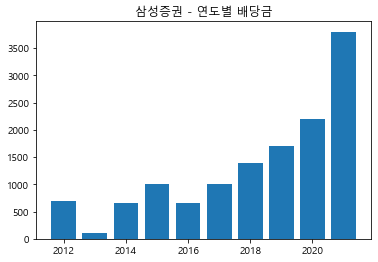

In [5]:
name = stock.get_market_ticker_name(code)

plt.title(f'{name} - 연도별 배당금')
plt.bar(range(int(start_year), int(end_year)+1), dps_list)
plt.show()

In [34]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(x[i], y[i]+5, y[i], ha = 'center')

In [35]:
years = [year for year in range(int(start_year), int(end_year)+1)]

In [36]:
dps_list

[700, 100, 650, 1000, 650, 1000, 1400, 1700, 2200, 3800]

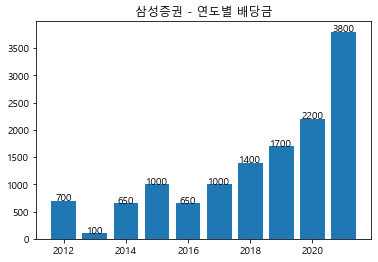

In [37]:
#name = stock.get_market_ticker_name(code)
plt.title(f'{name} - 연도별 배당금')
plt.bar(range(int(start_year), int(end_year)+1), dps_list)
addlabels(range(int(start_year), int(end_year)+1), dps_list)

#addlabels(years, dps_list)
plt.show()

배당 성장 연수와 배당 성장률 구하기

In [39]:
def getActualDivGrowth(divs):
    div_history = divs.copy()
    div_history.reverse()
    div_growth_list = []
    for div_cur, div_before in zip(div_history, div_history[1:]):
        print(f'div_cur = {div_cur}, div_before = {div_before}')
        if div_before == 0:
            #print('div_before is 0')
            break;

        if div_cur >= div_before:
            div_growth_list.append(div_cur)
        else:
            #print('div_before is more than div cur')
            div_growth_list.append(div_cur)            
            break

    div_growth_list.reverse()
    return len(div_growth_list) - 1, div_growth_list

In [40]:
actual_div_growth_cnt, actual_div_growth_list = getActualDivGrowth(dps_list)
actual_div_growth_cnt, actual_div_growth_list

div_cur = 3800, div_before = 2200
div_cur = 2200, div_before = 1700
div_cur = 1700, div_before = 1400
div_cur = 1400, div_before = 1000
div_cur = 1000, div_before = 650
div_cur = 650, div_before = 1000


(5, [650, 1000, 1400, 1700, 2200, 3800])

In [41]:
def getCAGR(div_history):
    cagr = (div_history[-1]/div_history[0]) ** (1/len(div_history)) - 1
    return cagr

In [42]:
cagr = getCAGR(actual_div_growth_list)
cagr

0.34218291622311514

"""
목표 주가 구하기
"""

In [43]:
start_date = '20150501'
end_date = '20230222'
df_f = stock.get_market_fundamental(start_date, end_date, code, freq='d')

In [44]:
df_f

,BPS,PER,PBR,EPS,DIV,DPS
날짜,,,,,,
2015-05-04,44832,20.45,1.41,3090,1.03,650
2015-05-06,44832,18.51,1.28,3090,1.14,650
2015-05-07,44832,19.00,1.31,3090,1.11,650
2015-05-08,44832,19.09,1.32,3090,1.10,650
2015-05-11,44832,20.32,1.40,3090,1.04,650
...,...,...,...,...,...,...
2023-02-16,68096,3.10,0.49,10810,11.33,3800
2023-02-17,68096,3.09,0.49,10810,11.36,3800
2023-02-20,68096,3.09,0.49,10810,11.36,3800


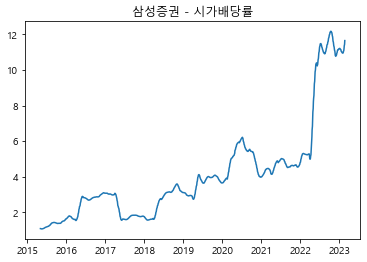

In [47]:
div_yields = savgol_filter(df_f.DIV, 51, 3)

plt.title(f'{name} - 시가배당률')
plt.plot(df_f.index.to_list(), div_yields)
plt.show()

In [48]:
df_p = stock.get_market_ohlcv(start_date, end_date, code)
df_p

,시가,고가,저가,종가,거래량,거래대금,등락률
날짜,,,,,,,
2015-05-04,64212,64406,61302,61302,559585,35944294300,-3.51
2015-05-06,60041,60041,54997,55482,1533532,89483350900,-9.49
2015-05-07,55385,57228,54221,56937,1108834,63795895500,2.62
2015-05-08,56937,57616,56161,57228,512919,30165021100,0.51
2015-05-11,59847,61884,59459,60914,915897,57566656700,6.44
...,...,...,...,...,...,...,...
2023-02-16,33150,33650,33150,33550,212991,7125313350,1.21
2023-02-17,33300,33700,33100,33450,120796,4043580300,-0.30
2023-02-20,33450,33650,33150,33450,138236,4621395750,0.00


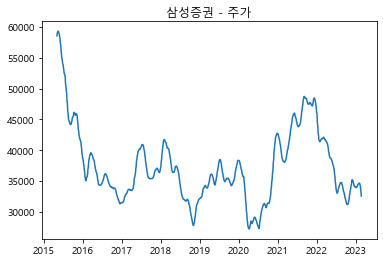

In [49]:
close_prices = savgol_filter(df_p.종가, 51, 3)

plt.title(f'{name} - 주가')
plt.plot(df_f.index.to_list(), close_prices)
plt.show()

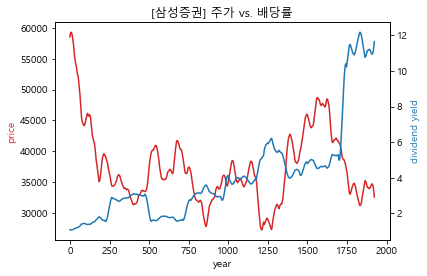

In [50]:
"""
주가 배당률 그리기
"""
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('year')
ax1.set_ylabel('price', color=color)
ax1.plot(close_prices, color=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('dividend yield', color=color)
ax2.plot(div_yields, color=color)
plt.title(f'[{name}] 주가 vs. 배당률')
plt.show()

In [ ]:
np.corrcoef(div_yields, close_prices)

"""
매수점수 계산
"""

In [51]:
df_cur_f = stock.get_market_fundamental('20230308', '20230308', code)
df_cur_f

,BPS,PER,PBR,EPS,DIV,DPS
날짜,,,,,,
2023-03-08,68096,2.93,0.46,10810,12.01,3800


In [52]:
cur_div = df_cur_f.DIV[0]
cur_div

12.01

In [61]:
cur_dps = dps_list[-1]
cur_dps 

3800

In [63]:
div_min = min(div_yields)
div_min

1.063628

In [64]:
target_price = cur_dps/div_min * 100
target_price

357267.78055756114

In [65]:
div_max = max(div_yields)
div_max

12.1823

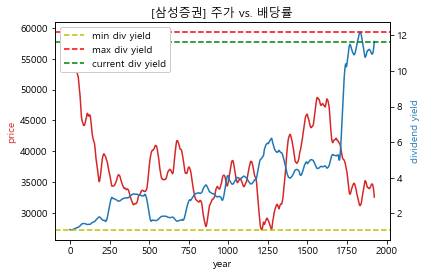

In [67]:
"""
주가 배당률 그리기
"""
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('year')
ax1.set_ylabel('price', color=color)
ax1.plot(close_prices, color=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('dividend yield', color=color)
ax2.plot(div_yields, color=color)

ax2.axhline(y=div_min, color='y', linestyle='--', label='min div yield')
ax2.axhline(y=div_max, color='r', linestyle='--', label='max div yield')
ax2.axhline(y=div_yields[-1], color='g', linestyle='--', label='current div yield')

plt.legend(loc='upper left', framealpha=1.0)
plt.title(f'[{name}] 주가 vs. 배당률')
plt.show()

In [53]:
def get_percentage(input, min, max):
    return round((input - min) / (max - min) * 100)

def calculate_buy_score(current_div_yield, div_min, div_max):
    buy_score = get_percentage(current_div_yield, div_min, div_max)
    return buy_score

In [ ]:
calculate_buy_score(cur_div, min(div_yields), max(div_yields))

In [ ]:
min(df_f.DIV)

In [ ]:
div_min = 
div_min

In [ ]:
df_cur_f.DPS[0]

In [58]:
div_min = min(div_yields)
div_min

1.063628

12.1823

In [ ]:
cur_dps = df_cur_f.DPS[0]
cur_dps

In [ ]:
target_price = cur_dps/div_min * 100
target_price

In [ ]:
buy_price = cur_div/div_max * 100
buy_price

In [ ]:
calculate_buy_score(df_cur_f.DIV[0], div_min, div_max)

In [ ]:
day = stock.get_nearest_business_day_in_a_week('20220610')
day

In [ ]:
"""
분석 기간
"""
start_year = '2012'
end_year = '2021'

"""
NH 투자증권
"""
code = '005940'


In [ ]:
"""
매년 5월 31에 제일 가까운 영업일의 배당금 가져 오기
"""
dps_list = []
for year in range(int(start_year)+1, int(end_year)+2):
    #print(year)
    last_business_day_of_may = stock.get_nearest_business_day_in_a_week(str(year)+'0531')
    print(last_business_day_of_may)
    df_annual_f = stock.get_market_fundamental(last_business_day_of_may, last_business_day_of_may, code)
    display(df_annual_f)
    dps_list.append(df_annual_f.DPS.values[0])
    time.sleep(1)

In [ ]:
dps_list

In [ ]:
def getAnnualDPS(start_year, end_year):
    dps_list = []
    for year in range(int(start_year)+1, int(end_year)+2):
        #print(year)
        last_business_day_of_may = stock.get_nearest_business_day_in_a_week(str(year)+'0531')
        #print(last_business_day_of_may)
        df_annual_f = stock.get_market_fundamental(last_business_day_of_may, last_business_day_of_may, code)
        #display(df_annual_f)
        dps_list.append(df_annual_f.DPS.values[0])
        time.sleep(1)
    return dps_list

In [ ]:
annual_dps_list = getAnnualDPS(start_year, end_year)
annual_dps_list

In [ ]:
years = range(int(start_year), int(end_year)+1)
years

In [ ]:
plt.bar(years, annual_dps_list)
plt.show()

In [ ]:
def getActualDivGrowth(divs):
    div_history = divs.copy()
    div_history.reverse()
    div_growth_list = []
    for div_cur, div_before in zip(div_history, div_history[1:]):
        print(f'div_cur = {div_cur}, div_before = {div_before}')
        if div_before == 0:
            #print('div_before is 0')
            break;

        if div_cur >= div_before:
            div_growth_list.append(div_cur)
        else:
            #print('div_before is more than div cur')
            div_growth_list.append(div_cur)            
            break

    div_growth_list.reverse()
    return len(div_growth_list) - 1, div_growth_list

In [ ]:
actual_div_growth_cnt, actual_div_growth_list = getActualDivGrowth(dps_list)
actual_div_growth_cnt, actual_div_growth_list

In [ ]:
getCAGR(actual_div_growth_list)